## 실습 1: aromawine 데이터로 히트맵 그린 후 vif 구하기
#### 종속변수는 Aroma, 나머지 변수들이 독립변수

In [26]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
wine = pd.read_excel('./data/wine_aroma.xlsx')
wine.head()

,Mo,Ba,Cr,Sr,Pb,B,Mg,Ca,K,Aroma
0,0.044,0.387,0.029,1.230,0.561,2.63,128.0,80.5,1130,3.3
1,0.160,0.312,0.038,0.975,0.697,6.21,193.0,75.0,1010,4.4
2,0.146,0.308,0.035,1.140,0.730,3.05,127.0,91.0,1160,3.9
3,0.191,0.165,0.036,0.927,0.796,2.57,112.0,93.6,924,3.9
4,0.363,0.380,0.059,1.130,1.730,3.07,138.0,84.6,1090,5.6


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mo      25 non-null     float64
 1   Ba      25 non-null     float64
 2   Cr      25 non-null     float64
 3   Sr      25 non-null     float64
 4   Pb      25 non-null     float64
 5   B       25 non-null     float64
 6   Mg      25 non-null     float64
 7   Ca      25 non-null     float64
 8   K       25 non-null     int64  
 9   Aroma   25 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 2.1 KB


In [9]:
wine.corr()

,Mo,Ba,Cr,Sr,Pb,B,Mg,Ca,K,Aroma
Mo,1.000000,-0.081569,0.514308,-0.074401,0.965979,-0.037375,0.269534,0.415927,-0.102673,0.245714
Ba,-0.081569,1.000000,0.101532,0.843082,0.000159,-0.273324,0.635956,0.452944,0.565111,-0.662194
Cr,0.514308,0.101532,1.000000,0.270142,0.465345,0.161006,0.339577,0.171120,0.530280,-0.112460
Sr,-0.074401,0.843082,0.270142,1.000000,-0.074317,-0.256545,0.744450,0.457940,0.704753,-0.804288
Pb,0.965979,0.000159,0.465345,-0.074317,1.000000,-0.120410,0.249407,0.434379,-0.124318,0.217690
B,-0.037375,-0.273324,0.161006,-0.256545,-0.120410,1.000000,0.058315,-0.060495,0.216681,0.299108
Mg,0.269534,0.635956,0.339577,0.744450,0.249407,0.058315,1.000000,0.601097,0.511837,-0.543104
Ca,0.415927,0.452944,0.171120,0.457940,0.434379,-0.060495,0.601097,1.000000,0.386629,-0.511762
K,-0.102673,0.565111,0.530280,0.704753,-0.124318,0.216681,0.511837,0.386629,1.000000,-0.568137
Aroma,0.245714,-0.662194,-0.112460,-0.804288,0.217690,0.299108,-0.543104,-0.511762,-0.568137,1.000000


<AxesSubplot:>

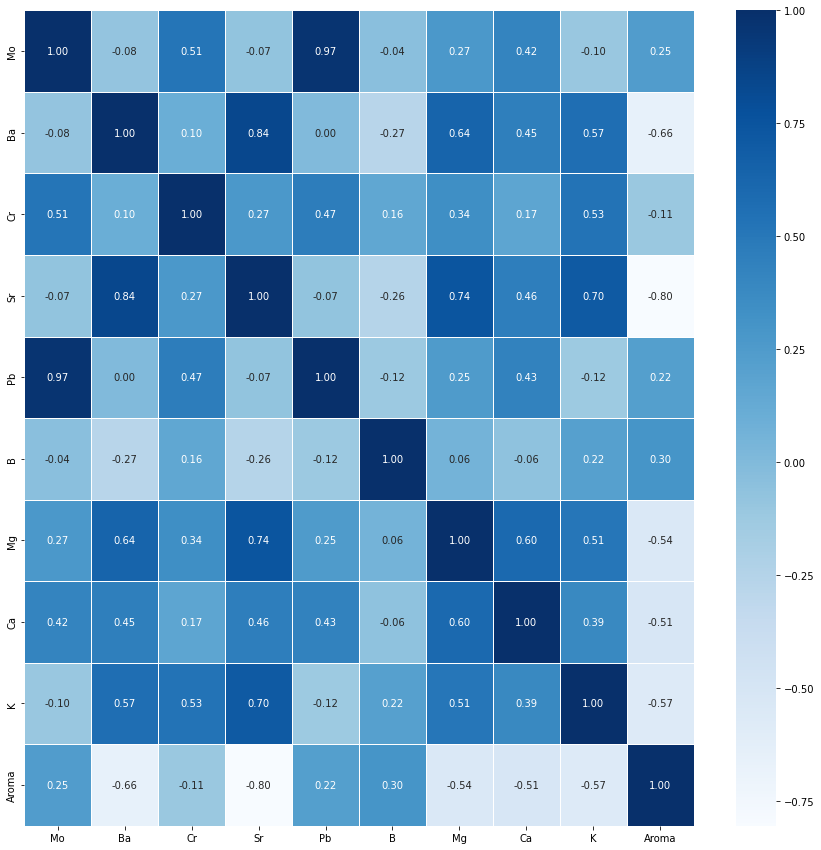

In [10]:
plt.figure(figsize=(15, 15))

sns.heatmap(data = wine.corr(), annot=True, fmt = ".2f", linewidths=.5, cmap="Blues")

In [33]:
X = wine[['Mo', 'Ba', 'Cr', 'Sr', 'Pb', 'B', 'Mg', 'Ca', 'K']]
Y = wine['Aroma']

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,85.311791,Mo
1,28.700675,Ba
2,18.610717,Cr
3,40.164814,Sr
4,95.631351,Pb
5,27.587390,B
6,61.935836,Mg
7,52.573653,Ca
8,94.803892,K


## 실습 2: aromawine 데이터로 ridge 회귀 진행하고, mse 값과 R^2 구하기 (alpha값 0.001, 0.01, 0.1)

In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
wine = pd.read_excel('./data/wine_aroma.xlsx')
wine.head()

,Mo,Ba,Cr,Sr,Pb,B,Mg,Ca,K,Aroma
0,0.044,0.387,0.029,1.230,0.561,2.63,128.0,80.5,1130,3.3
1,0.160,0.312,0.038,0.975,0.697,6.21,193.0,75.0,1010,4.4
2,0.146,0.308,0.035,1.140,0.730,3.05,127.0,91.0,1160,3.9
3,0.191,0.165,0.036,0.927,0.796,2.57,112.0,93.6,924,3.9
4,0.363,0.380,0.059,1.130,1.730,3.07,138.0,84.6,1090,5.6


In [53]:
X = wine.drop(labels="Aroma", axis=1)
Y = wine['Aroma']

In [56]:
alpha_list = [0.001, 0.01, 0.1]

for now_alpha in alpha_list:
    ridge = Ridge(alpha=now_alpha)
    ridge.fit(X, Y)

    Y_pred = ridge.predict(X)
    
    print("Alpha :", now_alpha)
    print("MSE :", mean_squared_error(Y, Y_pred))
    print("R^2 :", r2_score(Y, Y_pred))
    print()

Alpha : 0.001
MSE : 0.1962842115180633
R^2 : 0.8329643916469833

Alpha : 0.01
MSE : 0.22110929839539978
R^2 : 0.8118385279980327

Alpha : 0.1
MSE : 0.24513246766120322
R^2 : 0.7913950870210609



## 실습 3: aromawine 데이터로 선형 회귀 모형 만들고 adjusted r^2 값 구하기

In [57]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
wine = pd.read_excel('./data/wine_aroma.xlsx')
wine.head()

,Mo,Ba,Cr,Sr,Pb,B,Mg,Ca,K,Aroma
0,0.044,0.387,0.029,1.230,0.561,2.63,128.0,80.5,1130,3.3
1,0.160,0.312,0.038,0.975,0.697,6.21,193.0,75.0,1010,4.4
2,0.146,0.308,0.035,1.140,0.730,3.05,127.0,91.0,1160,3.9
3,0.191,0.165,0.036,0.927,0.796,2.57,112.0,93.6,924,3.9
4,0.363,0.380,0.059,1.130,1.730,3.07,138.0,84.6,1090,5.6


In [65]:
X = wine.drop(labels="Aroma", axis=1)
Y = wine["Aroma"]

linear = LinearRegression()
linear.fit(X, Y)

Y_pred = linear.predict(X)

r2 = r2_score(Y, Y_pred)

print("MSE :", mean_squared_error(Y, Y_pred))
print("R^2 :", r2)
print("Adjust R^2 :", 1 - (1-r2) * (len(Y)-1) / (len(Y) - X.shape[1] - 1))

MSE : 0.19336753487079109
R^2 : 0.8354464499560966
Adjust R^2 : 0.7367143199297546
